# Data Preprocessing and Exploratory Data Analysis

This notebook handles data loading, cleaning, preprocessing, and exploratory data analysis for the Sleep Quality Recommendation Engine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 2.2 Data Preprocessing

### Load Datasets

In [2]:
ratings = pd.read_csv('../data/sleep_ratings.csv')
items = pd.read_csv('../data/sleep_items.csv')
users = pd.read_csv('../data/sleep_users.csv')

print(f"Ratings shape: {ratings.shape}")
print(f"Items shape: {items.shape}")
print(f"Users shape: {users.shape}")

display(ratings.head())
display(items.head())
display(users.head())

Ratings shape: (51488, 5)
Items shape: (520, 8)
Users shape: (5000, 14)


,rating_id,user_id,item_id,rating,date
0,1,2798,18,5,2025-02-11
1,2,848,383,1,2025-11-29
2,3,798,171,4,2025-01-22
3,4,3701,359,5,2025-09-24
4,5,4426,307,4,2025-12-29


,item_id,name,category,features_json,description,average_rating,num_reviews,launch_date
0,1,Dream Track v1,Mobile Apps,"{""has_sleep_tracking"": true, ""has_meditation"":...","Dream Track v1 is a sleep app with meditation,...",2.84,395,2024-09-07
1,2,SlumberAI v1,Mobile Apps,"{""has_sleep_tracking"": false, ""has_meditation""...","SlumberAI v1 is a sleep app with meditation, t...",2.70,491,2023-05-17
2,3,Restful v1,Mobile Apps,"{""has_sleep_tracking"": true, ""has_meditation"":...","Restful v1 is a sleep app with meditation, tra...",2.60,80,2024-04-17
3,4,Sleep Mastery v1,Mobile Apps,"{""has_sleep_tracking"": false, ""has_meditation""...",Sleep Mastery v1 is a sleep app with meditatio...,3.67,203,2025-04-12
4,5,Zensleep v1,Mobile Apps,"{""has_sleep_tracking"": false, ""has_meditation""...","Zensleep v1 is a sleep app with meditation, tr...",3.68,434,2025-01-08


,user_id,age,gender,primary_sleep_issue,secondary_sleep_issue,exercise_frequency,caffeine_intake,screen_time_before_bed,stress_level,sleep_schedule,alcohol_consumption,napping_habit,num_years_with_issue,currently_treated
0,1,56,Female,Non-Restorative Sleep,Difficulty Falling Asleep,2-3x/week,Moderate,1-2 hours,High,Regular,Regular,Long naps,21,False
1,2,41,Male,Frequent Awakenings,Difficulty Falling Asleep,Occasionally,Very High,>2 hours,Moderate,Somewhat Regular,Occasionally,Long naps,28,True
2,3,29,Female,Frequent Awakenings,Shift Work Sleep,Never,High,1-2 hours,High,Somewhat Regular,Heavy,Long naps,28,True
3,4,64,Female,Restless Legs,Early Morning Awakening,Daily,Very High,<30 min,High,Irregular,Regular,Regular short naps,21,True
4,5,35,Female,Shift Work Sleep,Sleep Apnea,Occasionally,NaN,30-60 min,Low,Somewhat Regular,Heavy,Long naps,15,False


### Handle Missing Values and Duplicates

In [3]:
print("Missing Values in Ratings:")
print(ratings.isnull().sum())

print("\nDuplicate Rows in Ratings:")
print(ratings.duplicated().sum())

ratings_clean = ratings.drop_duplicates()

ratings_clean = ratings_clean.dropna()

print(f"\nShape after cleaning: {ratings_clean.shape}")

Missing Values in Ratings:
rating_id    0
user_id      0
item_id      0
rating       0
date         0
dtype: int64

Duplicate Rows in Ratings:
0

Shape after cleaning: (51488, 5)


### Scale Ratings to 1-5 Range

In [4]:
print(f"Rating Range: [{ratings_clean['rating'].min()}, {ratings_clean['rating'].max()}]")

if ratings_clean['rating'].max() > 5 or ratings_clean['rating'].min() < 1:
    print("Scaling ratings to 1-5 range...")
    scaler = MinMaxScaler(feature_range=(1, 5))
    ratings_clean['rating'] = scaler.fit_transform(ratings_clean[['rating']])
    print(f"New Rating Range: [{ratings_clean['rating'].min()}, {ratings_clean['rating'].max()}]")
else:
    print("Ratings are already within 1-5 range.")

Rating Range: [1, 5]
Ratings are already within 1-5 range.


### Extract Basic Statistics

In [5]:
n_users = ratings_clean['user_id'].nunique()
n_items = ratings_clean['item_id'].nunique()
n_ratings = ratings_clean.shape[0]

print(f"Number of Users: {n_users}")
print(f"Number of Items: {n_items}")
print(f"Number of Ratings: {n_ratings}")

total_possible_ratings = n_users * n_items
sparsity = 1 - (n_ratings / total_possible_ratings)
print(f"Sparsity Level: {sparsity:.4f} ({sparsity*100:.2f}%)")

rating_counts = ratings_clean['rating'].value_counts().sort_index()
print("\nRating Distribution:")
print(rating_counts)

Number of Users: 5000
Number of Items: 520
Number of Ratings: 51488
Sparsity Level: 0.9802 (98.02%)

Rating Distribution:
rating
1     2561
2     5123
3    10262
4    15462
5    18080
Name: count, dtype: int64


## 2.3 Basic Exploratory Analysis

### Plot User Activity and Item Popularity

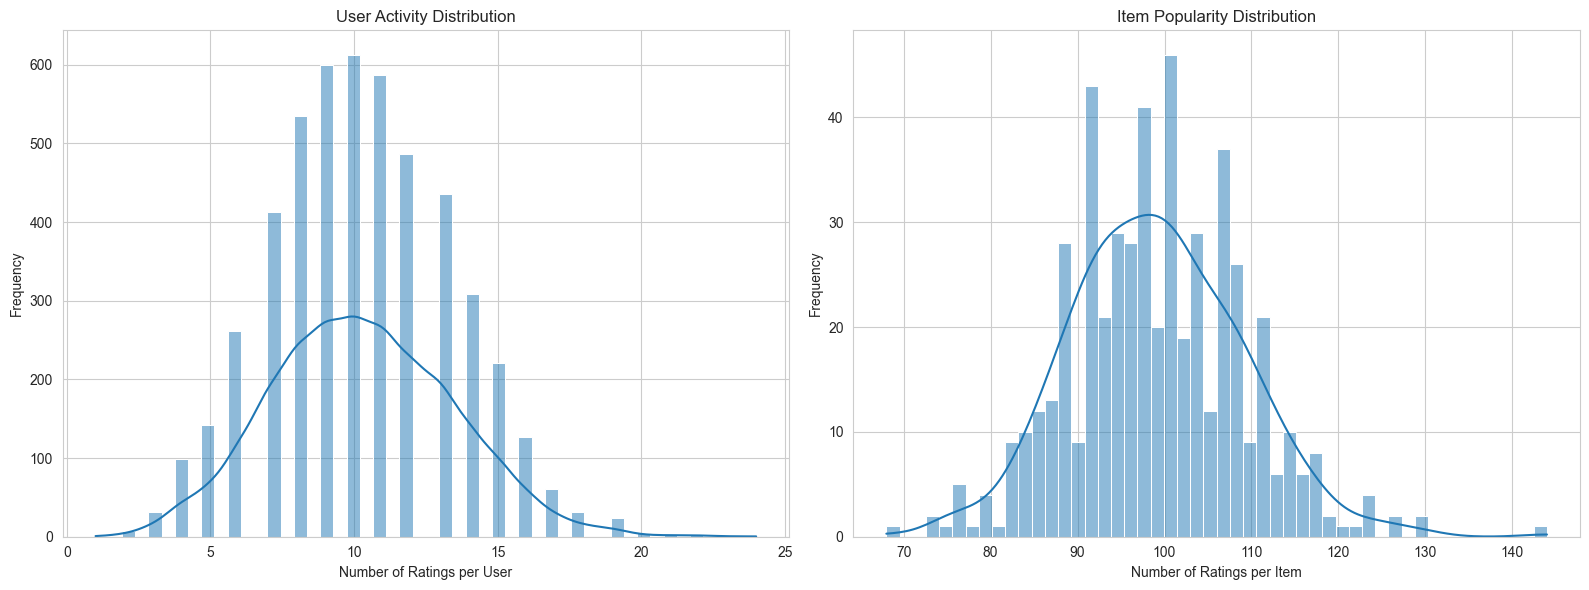

In [6]:
user_activity = ratings_clean.groupby('user_id').size().sort_values(ascending=False)

item_popularity = ratings_clean.groupby('item_id').size().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(user_activity, bins=50, kde=True, ax=axes[0])
axes[0].set_title('User Activity Distribution')
axes[0].set_xlabel('Number of Ratings per User')
axes[0].set_ylabel('Frequency')

sns.histplot(item_popularity, bins=50, kde=True, ax=axes[1])
axes[1].set_title('Item Popularity Distribution')
axes[1].set_xlabel('Number of Ratings per Item')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Identify Long-Tail Problem

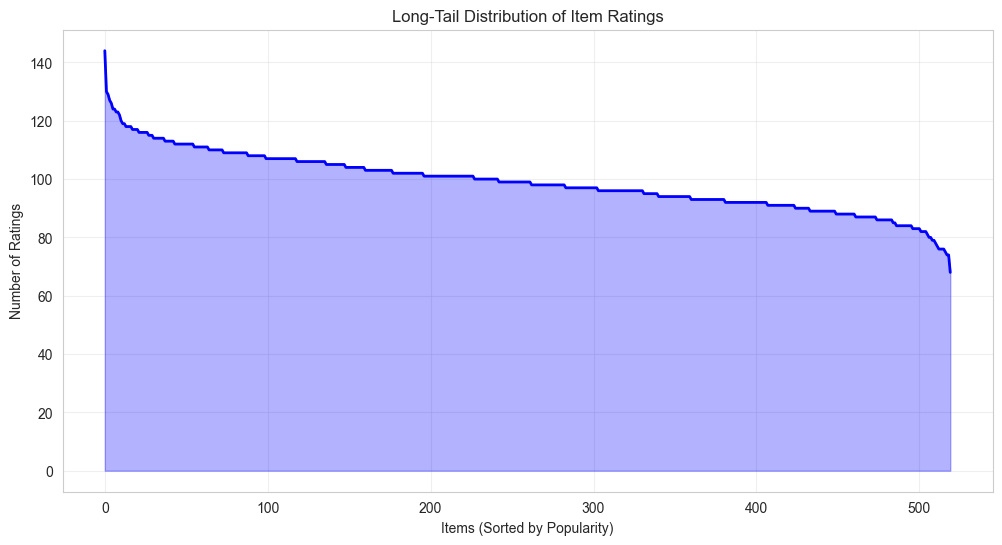

Top 20% of items account for 22.88% of all ratings.
Long-tail effect is less pronounced or distributed differently.


In [7]:
plt.figure(figsize=(12, 6))
plt.plot(item_popularity.values, color='blue', linewidth=2)
plt.title('Long-Tail Distribution of Item Ratings')
plt.xlabel('Items (Sorted by Popularity)')
plt.ylabel('Number of Ratings')
plt.fill_between(range(len(item_popularity)), item_popularity.values, color='blue', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

top_20_percent_index = int(n_items * 0.2)
top_20_ratings = item_popularity.iloc[:top_20_percent_index].sum()
total_ratings_count = item_popularity.sum()
coverage = (top_20_ratings / total_ratings_count) * 100

print(f"Top 20% of items account for {coverage:.2f}% of all ratings.")

if coverage > 70:
    print("Significant long-tail problem exists (Pareto Principle applies).")
else:
    print("Long-tail effect is less pronounced or distributed differently.")